# Unsupervised Learning

## Supervised Learning
- Labeled observations: Each observation is a tuple (x, y) of feature vector x and output label y which are related according to an unknown function f (x) = y.
- During training: Use the labeled observations to learn the relationship between x and y , i.e., find a function (or model) h(x) that best fits the observations
- Goal: Ensure that the learned model h(x) accurately predicts the output label of a previously unseen, test feature input (generalization)
- Labels : ‘Teachers’ during training, and ‘validator’ of results during testing

## Unsupervised Learning (Clustering)
- Unlabeled data set of feature vectors
- Clustering: Find sub-groups or clusers among feature vectors with similar traits
- Dimensionality Reduction: Find patterns within feature vector to identify a lower dimensional representation
  - eg. Image compression
- Examples: market segmentation, social network analysis
- Motivation:
  - Abundance of unlabeled data
  - Compressed representation saves on storage and computation
  - Reduce noise, irrelevant attributes in high dimensional data
  - Pre-processing step for supervised learning
  - Often used more in exploratory data analysis

## Clustering

- Goal: Find natural groupings among observations/objects/feature vectors
- Segment observations into clusters/groups such that
    - Objects within a cluster have high similarity (high intra-cluster similarity)
    - Objects across clusters have low similarity (low inter-cluster similarity)

## Proximity Indices

It is used to quantify the strength of relationship between any two feature vectors.
- Continuous-valued featuers
    - e.g. x = (0.1, 11, 15, 1.5), measure the `distance` between any two values


### Euclidean distance
It measures the shortest straight-line distance between two points in n-dimensional space. Think of it as applying the Pythagorean theorem in multiple dimensions.

$D_{\text{euclidean}}(a, b) = \sqrt{ \sum_{i=1}^{n} (a_i - b_i)^2 }$

```python
import numpy as np

def euclidean_distance(a, b):
    a, b = np.array(a), np.array(b)
    return np.sqrt(np.sum((a - b) ** 2))
```

### Manhattan Distance

Also called L1 norm. It’s like how a taxi would drive in a grid-like city: only moving horizontally or vertically.

$D_{\text{manhattan}}(a, b) = \sum_{i=1}^{n} |a_i - b_i|$

```python
def manhattan_distance(a, b):
    a, b = np.array(a), np.array(b)
    return np.sum(np.abs(a - b))
```

### Chebyshev Distance
Measures the greatest difference along any single coordinate. Useful in scenarios where movement in any one direction dominates the cost:

$D_{\text{chebyshev}}(a, b) = \max_{i=1}^{n} |a_i - b_i|$

```python
def chebyshev_distance(a, b):
    a, b = np.array(a), np.array(b)
    return np.max(np.abs(a - b))
```

### Hamming Distance?

The Hamming distance between two equal-length strings (or arrays) is the number of positions at which the corresponding symbols are different.

If $a$ and $b$ are two vectors of length $n$:

$D_{\text{hamming}}(a, b) = \sum_{i=1}^{n} \mathbb{1}(a_i \neq b_i)$

Where $\mathbb{1}$ is an indicator function that returns 1 if the values differ, and 0 if they’re the same.

Works best with:
- Binary vectors (e.g. [0, 1, 1, 0])
- Strings (e.g. "karolin" vs "kathrin")



### Hamming Distance Matrix

A Hamming distance matrix is a symmetric matrix showing the pairwise Hamming distances between multiple vectors.

Example:

Suppose we have these binary vectors:
```
A = [1, 0, 1, 1]
B = [1, 1, 0, 1]
C = [0, 0, 1, 0]
```
Then the Hamming distance matrix is:
```
	A	B	C
A	0	2	2
B	2	0	3
C	2	3	0
```
Each value is the number of differing bits between the row and column vectors.

In the example below, scipy.spatial.distance.hamming returns the normalized distance (a proportion), so multiply by vector length to get the raw count.

In [2]:

from scipy.spatial.distance import hamming
import numpy as np

# Binary data
X = np.array([
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 0, 1, 0]
])

# Compute pairwise Hamming distances
n = len(X)
hamming_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        hamming_matrix[i, j] = hamming(X[i], X[j]) * X.shape[1]  # multiply to get actual distance

print(hamming_matrix)


[[0. 2. 2.]
 [2. 0. 4.]
 [2. 4. 0.]]


## K-Means

- Initializes k random centroids.
- Assigns each point to the nearest centroid.
- Recomputes centroids based on assignments.
- Repeats until convergence.

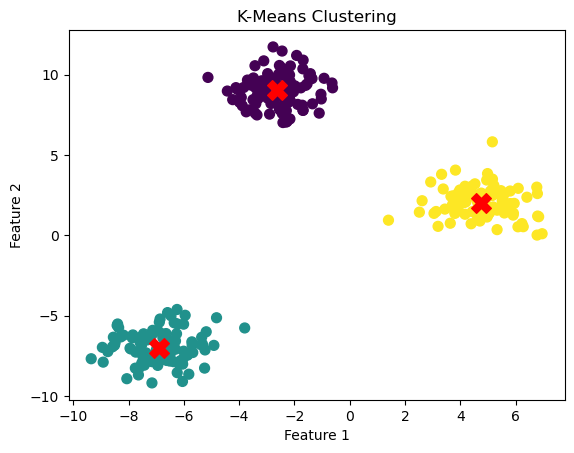

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data: 3 clusters in 2D
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Feature Scaling

Feature scaling is the process of transforming your input variables (features) so they’re on a similar scale.

For example:
- Raw feature values: [age: 25, salary: 90,000, height: 180]
- After scaling, these might become: [0.2, 0.8, 0.7]

### Why Do We Need Feature Scaling?
Many ML algorithms assume features are on the same scale — if they’re not, you could
- Biased models (some features dominate because they have larger values)
- Slower convergence in gradient-based algorithms
- Incorrect distance calculations (in k-NN, k-means, SVM, etc.)

Algorithms that care about scale:
- k-NN
- k-Means
- SVM
- PCA
- Logistic/Linear Regression (with regularization)
- Neural Networks

### Min-Max Normalization (Rescaling)

Scales values to a fixed range, usually [0, 1].

Formula:

$x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$

Example:
If height is 150–200 cm and someone is 180 cm:

$\frac{180 - 150}{200 - 150} = \frac{30}{50} = 0.6$

Pros:
- Preserves shape of original distribution
- Keeps everything in a bounded range

Cons:
- Sensitive to outliers (they can squash everything else)

### Z-score Standardization (Standard Scaling)

Centers the feature around 0 with unit variance — useful when data is approximately Gaussian.

Formula:

$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$

Where:
- $\mu$ = mean of the feature
- $\sigma$ = standard deviation of the feature

Example:
If the mean age is 40 and std is 10, a 30-year-old becomes:

$\frac{30 - 40}{10} = -1$

Pros:
-	Not bounded, but handles outliers better than min-max
-	Great for algorithms assuming Gaussian input (like linear models, logistic regression, PCA)

